In [1]:
# load necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(1)
%matplotlib inline

# get data
df = pd.read_csv('../../Ex03/Exercise3/DiabetesDataset.csv')
# keep the patient characteristics as inputs X and the diabetes as target y
X = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# check out the size of the training and test datasets
print ("Training Set Size:", len(X_train))
print ("Test Set Size:", len(X_test))

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print ("Training Set Size:", len(X_train_val))
print ("Validation Set Size:", len(X_val))
print ("Test Set Size:", len(X_test))

Training Set Size: 691
Test Set Size: 77
Training Set Size: 552
Validation Set Size: 139
Test Set Size: 77


### Find optimal k using the validation data set with Cross Validation

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### 1. Store mean and standard deviation of cross validation

In [3]:
mean_scores = []
scores_std = []

#### 1. Create a new model 
#### 2. Compute accuracyscore for each fold
#### 3. Compute the average and standard deviation of the CV scores and add them to their respective arrays

In [4]:
for k in range(1,101):
    knn_cross_val = KNeighborsClassifier(n_neighbors=k)
    cross_val_scores = cross_val_score(knn_cross_val, X_train, y_train, cv=10)
    mean_scores.append(np.mean(cross_val_scores))
    scores_std.append(np.std(cross_val_scores))
    

#### 4. Find the best k
#### 5. plot all scores for all tested values of k with their standard deviations and a vertical line the depicts the best k


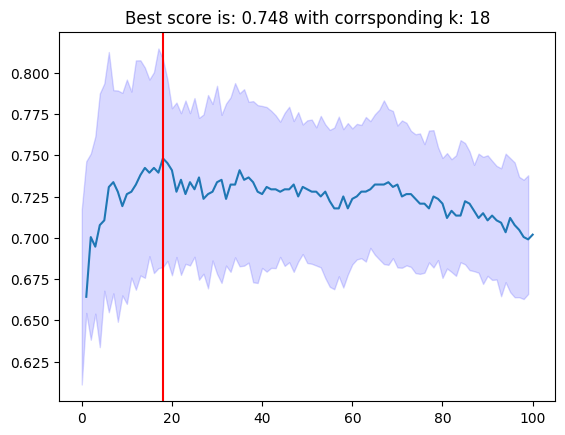

In [5]:
best_score = max(mean_scores)
best_k = mean_scores.index(best_score) + 1

best_score_rounded = round(best_score,3)

title = (f'Best score is: {best_score_rounded} with corrsponding k: {best_k}')

plt.plot(range(1,101),mean_scores)
plt.title(title)

mean_scores_np = np.array(mean_scores)
scores_std_np = np.array(scores_std)

plt.fill_between(range(0, len(mean_scores)), mean_scores_np + scores_std_np, mean_scores_np - scores_std_np, alpha=0.15, color='blue')
plt.axvline(x=best_k, c='r')
plt.show()

### Train Model with optimal k

#### train the final kNN classifier to the training data

#### compute predictions for the test data

#### compute and print the accuracy score on the test data

#### compute the confusion matrix for the test set

#### plot the confusion matrix for the test set using a heatmap

In [6]:
knn_model_cv = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)
prediction = knn_model_cv.predict(X_test)
accuracy = knn_model_cv.score(X_test, y_test)
confusion_matrix = confusion_matrix(y_test, prediction)

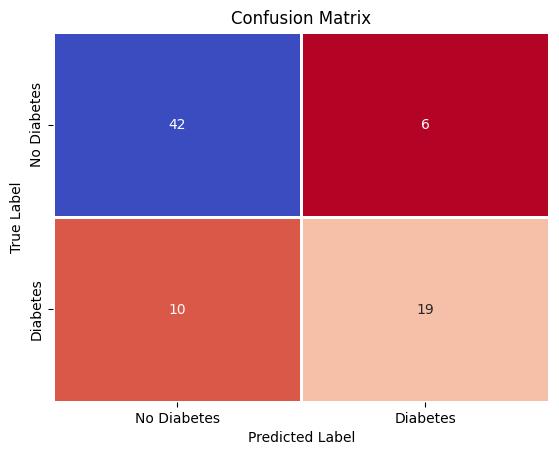

In [8]:
labels = ["No Diabetes", "Diabetes"]
sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='d', 
            cbar=False, 
            cmap="coolwarm_r",
            xticklabels=labels, 
            yticklabels=labels,
            linewidth = 1)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()